In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("card transactions.csv")
df = df[df.columns[:10]]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             96753 non-null  int64  
 1   Cardnum            96753 non-null  int64  
 2   Date               96753 non-null  object 
 3   Merchnum           93378 non-null  object 
 4   Merch description  96753 non-null  object 
 5   Merch state        95558 non-null  object 
 6   Merch zip          92097 non-null  float64
 7   Transtype          96753 non-null  object 
 8   Amount             96753 non-null  float64
 9   Fraud              96753 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 7.4+ MB


In [52]:
df['Merch zip'] = df['Merch zip'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             96753 non-null  int64  
 1   Cardnum            96753 non-null  int64  
 2   Date               96753 non-null  object 
 3   Merchnum           93378 non-null  object 
 4   Merch description  96753 non-null  object 
 5   Merch state        95558 non-null  object 
 6   Merch zip          92097 non-null  object 
 7   Transtype          96753 non-null  object 
 8   Amount             96753 non-null  float64
 9   Fraud              96753 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 7.4+ MB


#### Categorical fields

In [6]:
df.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [71]:
ccol = 'Amount'
# n of unique
df.groupby(ccol).count()['Recnum'].sort_values(ascending=False)

Amount
3.62          4283
3.67          1620
3.74           913
3.80           827
4.37           378
              ... 
73.23            1
354.93           1
354.91           1
73.24            1
3102045.53       1
Name: Recnum, Length: 34909, dtype: int64

In [68]:
# extract head
head = 15

blc30 = df.groupby(ccol).count()['Recnum'].sort_values(ascending=False).head(head).reset_index()[ccol]
df_head = df[df[ccol].isin(blc30)]


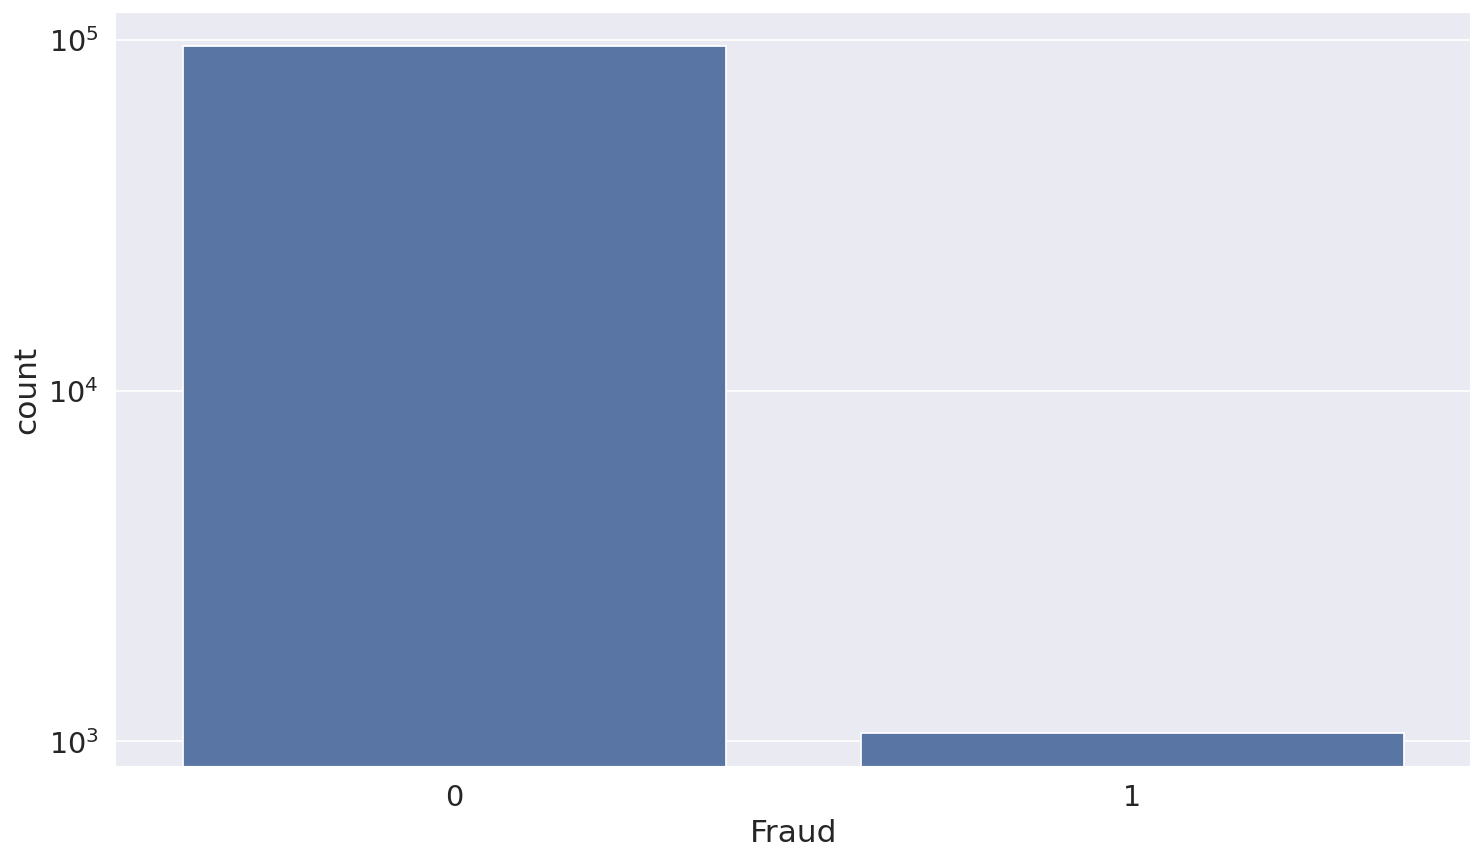

In [70]:
plt.rcParams['figure.figsize']=[14,8]
#plt.rcParams['figure.dpi']=125
g=sns.set(font_scale = 1.5)
g = sns.set_color_codes("deep")
g = sns.countplot(x=ccol, data=df_head, color='b',order=df_head[ccol].value_counts().index)
#plt.xticks(rotation=90)
g.set_yscale('log')
#plt.show()
#plt.tight_layout()
plt.savefig(ccol+'.png', bbox_inches='tight')
#, bbox_inches='tight'#

In [72]:
ncol = 'Amount'
print('unique: ', df[ncol].nunique())
print('mean: ', round(df[ncol].mean(),2))
print('std: ', round(df[ncol].std(), 2))
print('min: ', df[ncol].min())
print('max: ', df[ncol].max())
print('zero: ', np.sum(df[ncol] == 0))

unique:  34909
mean:  427.89
std:  10006.14
min:  0.01
max:  3102045.53
zero:  0


In [98]:
#without outlier
wo_df = df[df[ncol] <=9000]

print('% populated: ', round((len(wo_df)/sum(df[ncol].notnull()))*100, 2))

% populated:  99.91


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


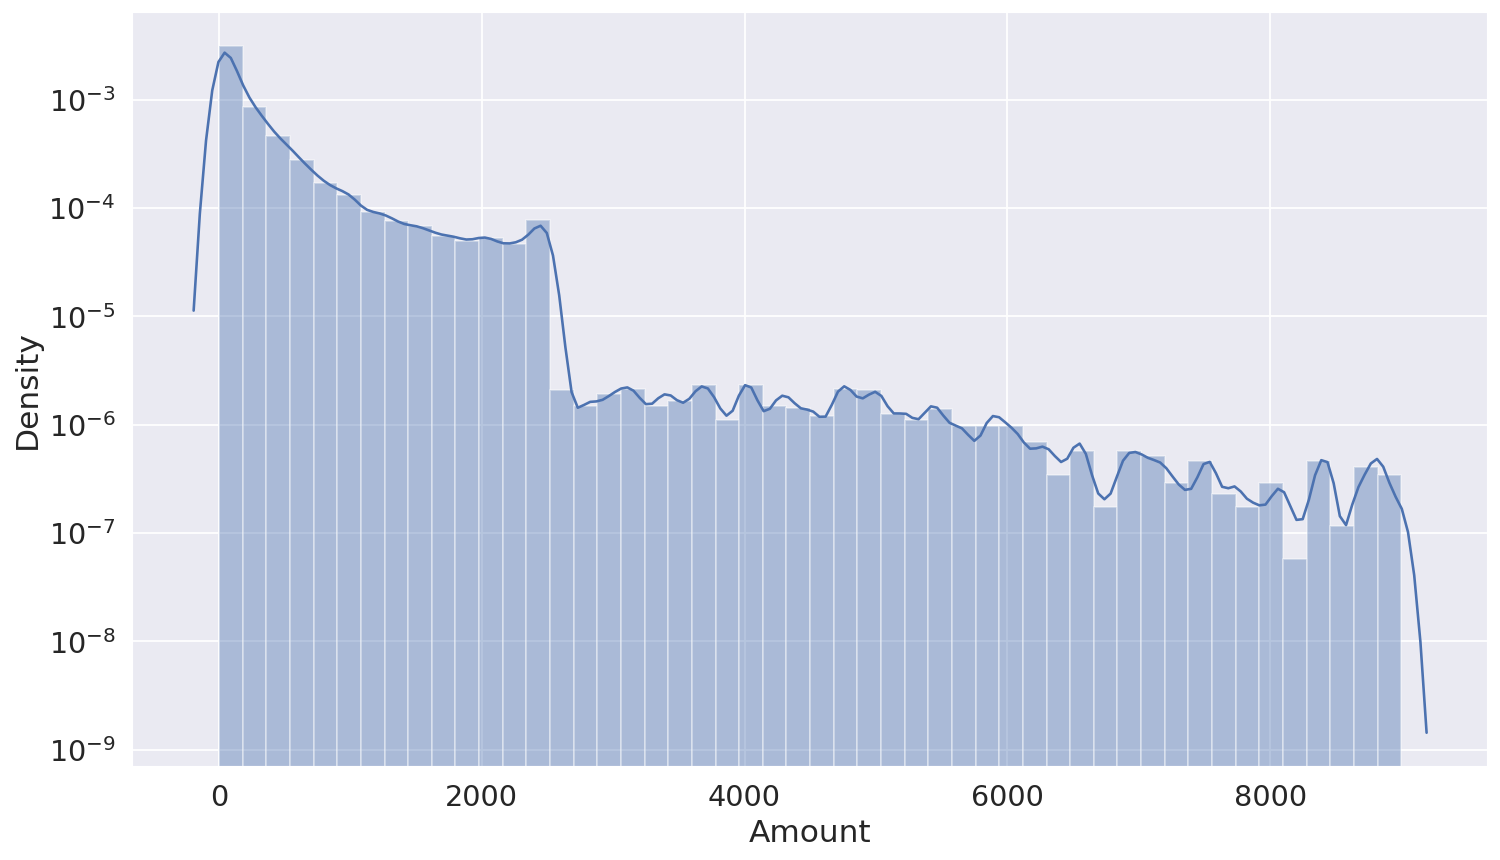

In [99]:
plt.rcParams['figure.figsize']=[14,8]
#plt.rcParams['figure.dpi']=125
g=sns.set(font_scale = 1.5)
g = sns.set_color_codes("deep")
g = sns.distplot(wo_df[ncol], color='b')
#plt.xticks(rotation=90)
g.set_yscale('log')
#plt.show()
plt.savefig(ncol+'.png', bbox_inches='tight')

In [82]:
df.Amount

0           3.62
1          31.42
2         178.49
3           3.62
4           3.62
          ...   
96748      84.79
96749     118.75
96750     363.56
96751    2202.03
96752     554.64
Name: Amount, Length: 96753, dtype: float64

In [5]:
df.Date = pd.to_datetime(df.Date)
df['weekday'] = df.Date.dt.day_name()

In [7]:
df['days'] = 0
day = 1
for i in range(len(df)-1):
    if df.loc[i, 'weekday'] == df.loc[i+1, 'weekday']:
        df.loc[i, 'days'] = day
    else:
        df.loc[i, 'days'] = day
        day=day+1


In [25]:
df.loc[96752,'days'] = 365
df

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,weekday,days
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,Friday,1
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,Friday,1
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,Friday,1
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,Friday,1
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,Friday,1
...,...,...,...,...,...,...,...,...,...,...,...,...
96748,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0,Friday,365
96749,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0,Friday,365
96750,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0,Friday,365
96751,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0,Friday,365


In [67]:
daily = df.groupby('days')['Amount'].count().reset_index()
daily = daily.rename(columns={'Amount':'number of transactions'})

<AxesSubplot:xlabel='days', ylabel='number of transactions'>

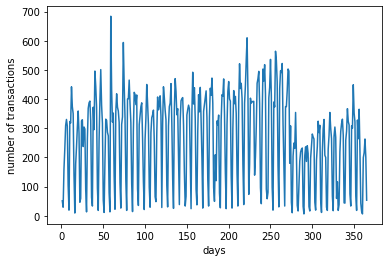

In [68]:
sns.lineplot(x = daily['days'], y =daily['number of transactions'] )

In [36]:
df.loc[0,'Date'].isocalendar()[1]

53

In [40]:
df['week'] = 0
for i in range(len(df)):
    df.loc[i, 'week'] = df.loc[i,'Date'].isocalendar()[1]
    

In [57]:
for i in range(len(df)):
    if df.loc[i, 'week'] ==53:
        df.loc[i, 'week'] =0

In [59]:
df['week'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52])

In [60]:
weekly = df.groupby('week')['Amount'].count().reset_index()
weekly = weekly.rename(columns={'Amount':'number of transactions'})


In [64]:
weekly = weekly[1:]

<AxesSubplot:xlabel='week', ylabel='number of transactions'>

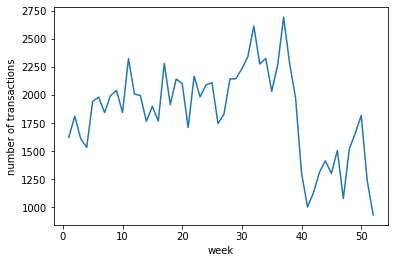

In [65]:
sns.lineplot(x = weekly['week'], y =weekly['number of transactions'] )